## FEM : Assignment 2 : Finite Element Solver of a Poisson Equation in One Dimension

In [26]:
#using PyPlot
using Plots
using LinearAlgebra
using Printf

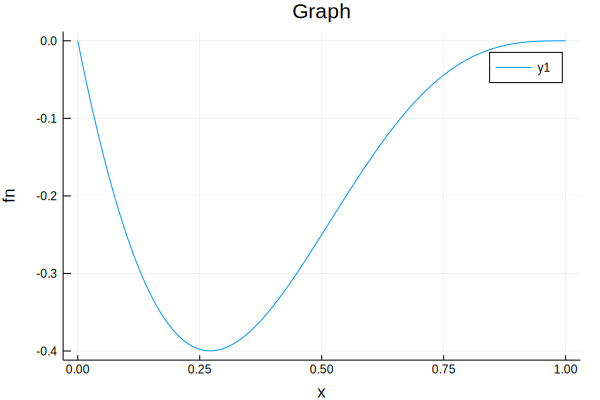

In [27]:
n = 512
x = (0:1/n:1)
y1 = -(x .- 1 ).^2 .* sin.(pi*x)
# :auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
plot(x,y1,xlabel = "x",ylabel = "fn",title=" Graph",linestyle=:solid)

### A5 : Write a Julia code that construct the mesh representation [p,e].

In [28]:
x = (0:1/n:1)
p = zeros(n+1,2)
e = zeros(Int64,n+1,2)
for i = 1:n
    p[i,1]=x[i]
    p[i,2]=x[i+1]
    e[i,1] = i
    e[i,2] = i + 1
end
c = [p,e]

2-element Array{Array{Float64,2},1}:
 [0.0 0.00195313; 0.00195313 0.00390625; … ; 0.998047 1.0; 0.0 0.0]
 [1.0 2.0; 2.0 3.0; … ; 512.0 513.0; 0.0 0.0]                      

### A6:Write a Julia code that given the coordinate xi return as output the source function f(xi)

In [29]:
function f(x)
    2*sin(pi*x) + 4*pi*(x - 1)*cos(pi*x) - pi^2 *(x-1)^2*sin(pi*x)
end

f (generic function with 1 method)

### A7: Write a Julia code that given the coordinates xi and xi+1 of the end points of element ei generates the 2 * 2 element matrix S_ei

In [30]:
function S(x1,x2)
    S_e = [1 -1; -1 1]
    S_e = (1/(x2-x1))*S_e
    return S_e
end

S (generic function with 1 method)

### A8: Write a Julia code that given the coordinates xi and xi+1 of the end points of element e_i generates the 2 * 1 element vector f_ei

In [31]:
function f_e(x1,x2)
    f1 = f(x1)
    f2 = f(x2)
    fe = ((x2-x1)/2) * [f1;f2]
    return fe
end

f_e (generic function with 1 method)

### A9: Write a Julia code that assembles all the element matrices Aei into the global matrix (n + 1) * (n + 1) matrix A. To so by first initializing A to be an empty (n + 1) * (n + 1) matrix and subsequently performing a loop over the elements. In this loop the element matrices are generated and added to the global matrix. In this addition the connectivity of the mesh defined by the matrix e needs to be taken into account

In [32]:
function compute_A(n,e)
    A = zeros(n+1,n+1)
    x = (0:1/n:1)
    for i = 1:n
        S_e = S(x[i],x[i+1])
        for j = 1:2
            for k = 1:2
                A[e[i, j], e[i, k]] = A[e[i, j], e[i, k]] + S_e[j, k]
            end
        end
    end
    return A
end

compute_A (generic function with 1 method)

### A10: Write a Julia code that assembles all the element vectors fei into the global matrix (n + 1) * 1 vector f . To so by first initializing f to be an empty (n + 1) * 1 vector and subsequently performing a loop over the elements. In this loop the element vectors are generated and added to the global vector. In this addition the connectivity of the mesh defined by the matrix e needs to be taken into account.

In [33]:
function compute_f_vec(n,e)
    f_vec_e = zeros(n+1,1)
    x = (0:1/n:1)
    for i = 1:n
        f_vec_ei = f_e(x[i],x[i+1])
        for j = 1:2
            f_vec_e[e[i, j]] = f_vec_e[e[i, j]] + f_vec_ei[j]
        end
    end
    return f_vec_e
end

compute_f_vec (generic function with 1 method)

### A11 : Treatment of the Boundary Conditions

In [34]:
A = compute_A(n,e)
f_vector = compute_f_vec(n,e)
# Set the boundary conditions
A[1, 1] = 1
A[1, 2] = 0
f_vector[1] = 0

0

### A12 : Solving the Global Linear System

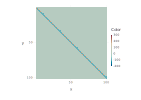

In [10]:
using Gadfly
Gadfly.spy(A)

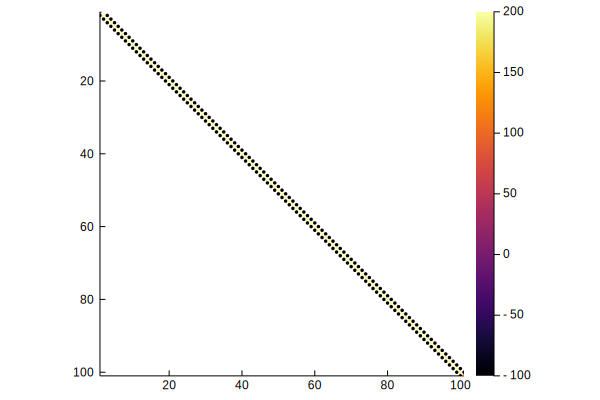

In [23]:
using SparseArrays
Plots.spy(sparse(A), markersize = 2)

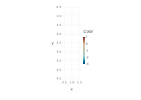

In [42]:
Gadfly.spy(f_vector)

### A13 : Compute the finite element solution u_h

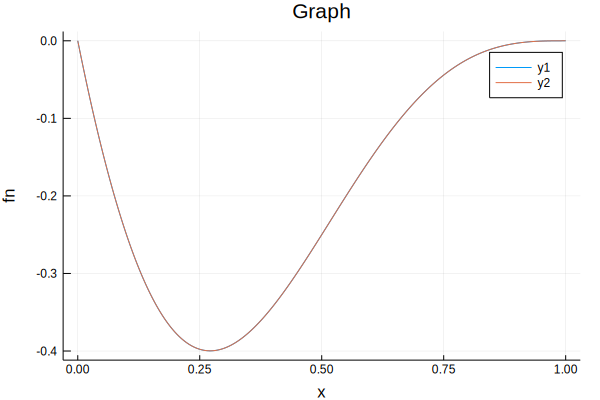

In [35]:
x = (0:1/n:1)
y1 = -(x .- 1 ).^2 .* sin.(pi*x)
u_h = A\f_vector
# :auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
plot(x,y1,xlabel = "x",ylabel = "fn",title=" Graph",linestyle=:solid)
plot!(x,u_h)

### A14 : Elective :  Compute the error for different meshes

In [36]:
num = [2; 4; 8; 16; 32; 64; 128; 256; 512]

9-element Array{Int64,1}:
   2
   4
   8
  16
  32
  64
 128
 256
 512

In [40]:
error = zeros(9)
for k = 1:9
    p = zeros(num[k]+1,2)
    e = zeros(Int64,num[k]+1,2)
    for i = 1:num[k]
        p[i,1]=x[i]
        p[i,2]=x[i+1]
        e[i,1] = i
        e[i,2] = i + 1
    end
    A = compute_A(num[k],e)
    f_vector = compute_f_vec(num[k],e)
    # Set the boundary conditions
    A[1, 1] = 1
    A[1, 2] = 0
    f_vector[1] = 0
    x1 = (0:1/num[k]:1)
    y1 = -(x1 .- 1 ).^2 .* sin.(pi*x1)
    u_h = A\f_vector
    error[k] = norm(y1-u_h,1)
end

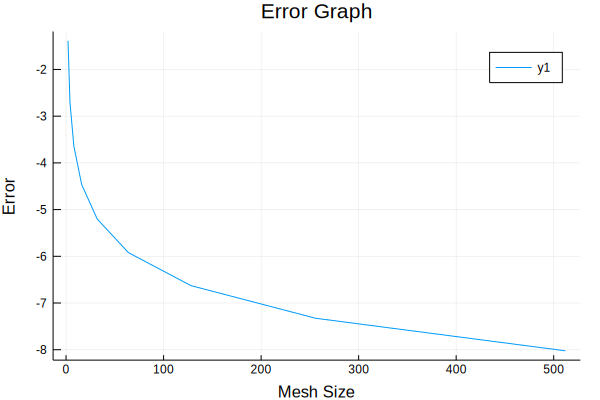

In [43]:
plot(num,log.(error),xlabel = "Mesh Size",ylabel = "Error",title="Error Graph",linestyle=:solid)